# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

#### Edición 2024

---

## Trabajo práctico entregable - Parte 1

In [170]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

sns.set_context('talk')

### Lectura del dataset

In [171]:
file_url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(file_url)

# Para chequear que se haya cargado bien, mostramos las primeras filas
df.head()

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,profile_studies_level_state,profile_career,Institución educativa,¿Salir o seguir contestando sobre las guardias?,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),680000.0,520000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis
1,Argentina,Catamarca,Full-Time,Staff (planta permanente),650000.0,520000.0,NaN,NaN,No,No recibo bono,...,Completo,Licenciatura en Sistemas de Información,Universidad Siglo 21,Terminar encuesta,NaN,NaN,NaN,NaN,45,Varón Cis
2,Argentina,Catamarca,Full-Time,Staff (planta permanente),125000.0,104000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis
3,Argentina,Chaco,Part-Time,Staff (planta permanente),190000.0,240000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Mujer Cis
4,Argentina,Chaco,Full-Time,Tercerizado (trabajo a través de consultora o ...,250000.0,207000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,Varón Cis


### Ejercicio 1 - Análisis descriptivo

Queremos responder a la siguiente pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello, lo que tenemos que tener en cuenta y realizar es lo siguiente:

- Para la eliminación de valores extremos, vamos a hacer las siguientes consideraciones:
  - Todas las filas que tengan algún valor nulo en las columnas que queramos analizar no las tendremos en cuenta
  - Consideraremos las filas cuyo sueldo bruto sea mayor al [Salario Mínimo Vital y Móvil](https://www.argentina.gob.ar/noticias/incremento-del-salario-minimo-vital-y-movil) de Argentina a mitad del 2024, es decir, mayor a $\$87.987$
  - Consideraremos las filas cuyo sueldo neto sea mayor al $\$87.987\times(100-17)\%=\$73.029,21$, dado que las retenciones que se aplican en Argentina al sueldo bruto son del $17\%$ según se menciona [aquí](https://www.argentina.gob.ar/trabajo/buscastrabajo/conocetusderechos/salario#aportes)
  - Luego de estos filtros, vamos a tomar las filas cuyo sueldo neto sea menor al percentil $90$ de este para evitar los casos extremos superiores
- La comparación que vamos a realizar entre los salarios para los diferentes lenguajes de programación va a ser comparando las distribuciones de salario para cada uno de estos. Por ello, utilizaremos muchas *visualizaciones* para las comparaciones.

In [172]:
# Por ello, nuestras variables a considerar van a ser:

# - Salario Mínimo Vital y Móvil
SMVYM = 87_987

# - Porcentaje de aportes obligatorios en Argentina
SALARY_CONTRIBUTIONS = 0.17

# - Percentil a considerar para salarios altos
PERCENTILE = 0.9

#### Elección de las columnas a considerar

Veamos cuáles son las columnas que contiene nuestro DataFrame:

In [173]:
df.columns

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'salary_in_usd', 'salary_last_dollar_value', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       '¿En qué mes fue el último ajuste?', 'salary_comparison_last_semester',
       '¿Contás con beneficios adicionales?', 'salary_satisfaction',
       'Trabajo de', 'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'tools_platform', 'tools_programming_languages', 'tools_frameworks',
       'tools_data_bases', 'tools_qa_testing', 'company_employee_number',
       'work_work_modality',
       'Si trabajás bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended',
       '¿Qué tanto estás usando Copilot, ChatGPT u otras herramientas de IA para tu trabajo?

Luego, vemos que las columnas que vamos a querer considerar son las siguientes:
- `salary_monthly_BRUTO`
- `salary_monthly_NETO`
- `tools_programming_languages`

In [174]:
relevant_columns = [
    'salary_monthly_BRUTO',
    'salary_monthly_NETO',
    'tools_programming_languages',
]

Y, efectivamente, hacemos el filtrado:

In [175]:
# Nos quedamos con las columnas que nos interesan
df_filtered = df[relevant_columns]

# Vemos el head para chequear
df_filtered.head()

,salary_monthly_BRUTO,salary_monthly_NETO,tools_programming_languages
0,680000.0,520000.0,"Bash/Shell, Python"
1,650000.0,520000.0,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T..."
2,125000.0,104000.0,"SQL, Oracle APEX, PL-SQL, SQL Developer"
3,190000.0,240000.0,ABAP
4,250000.0,207000.0,Java


#### Eliminación de filas inválidas y/o extremas

Primero, eliminamos todas aquellas filas que tengan alguno de los cuatro campos a considerar nulo:

In [176]:
# Eliminamos las filas con algún NaN
df_without_nan = df_filtered.dropna()

# Vemos cuántas filas quedaron y cuántas eliminamos
print(f'Eliminamos un total de {df_filtered.shape[0] - df_without_nan.shape[0]} filas.')

# Chequeamos que efectivamente no haya NaN
for column in df_without_nan.columns:
    assert df_without_nan[column].isnull().sum() == 0

Eliminamos un total de 241 filas.


Ahora, vamos a considerar solo aquellas cuyo sueldo BRUTO sea mayor al SMVyM a mediados del 2023 ($\$87.987$):

In [177]:
# Nos quedamos con las filas cuyo salario bruto sea mayor al SMVyM
df_ge_smvym = df_without_nan[df_without_nan['salary_monthly_BRUTO'] >= SMVYM]

# Vemos cuántas filas quedaron y cuántas eliminamos
print(f'Eliminamos un total de {df_without_nan.shape[0] - df_ge_smvym.shape[0]} filas.')

Eliminamos un total de 351 filas.


El siguiente paso es eliminar las filas cuyo salario neto es menor al SMVyM sacando el porcentaje obligatorio de aportes en Argentina:

In [178]:
# Calculamos el mínimo salario neto a considerar
min_salary_net = SMVYM * (1 - SALARY_CONTRIBUTIONS)

# Nos quedamos con las filas cuyo salario neto sea mayor al mínimo
df_ge_min_salary_net = df_ge_smvym[df_ge_smvym['salary_monthly_NETO'] >= min_salary_net]

# Vemos cuántas filas quedaron y cuántas eliminamos
print(f'Eliminamos un total de {df_ge_smvym.shape[0] - df_ge_min_salary_net.shape[0]} filas.')

Eliminamos un total de 62 filas.


Ahora, si queremos analizar lo que nos queda luego de esta limpieza parcial, podemos notar que todavía tenemos casos extremos pero en la parte superior (dado que son $45M por mes)

In [179]:
# Ver la descripción de los sueldos netos sin números científicos
df_ge_min_salary_net['salary_monthly_NETO'].describe().apply(lambda x: format(x, 'f'))

count        5151.000000
mean       607010.881346
std        976669.702959
min         73560.000000
25%        286374.500000
50%        420000.000000
75%        620000.000000
max      45000000.000000
Name: salary_monthly_NETO, dtype: object

Por ello, vamos a considerar solo aquellos valores menores al percentil $90$:

In [180]:
# Seteamos nuestro percentil
percentile_value = df_ge_min_salary_net['salary_monthly_NETO'].quantile(PERCENTILE)

print(f'Percentil {PERCENTILE * 100:.0f}: {percentile_value:.2f}')

# Nos quedamos con las filas cuyo salario neto sea menor al percentil
df_lt_percentile = df_ge_min_salary_net[df_ge_min_salary_net['salary_monthly_NETO'] <= percentile_value]

# Vemos cuántas filas quedaron y cuántas eliminamos
print(f'Eliminamos un total de {df_ge_min_salary_net.shape[0] - df_lt_percentile.shape[0]} filas.')

Percentil 90: 1072500.00
Eliminamos un total de 515 filas.


Luego, entonces, luego de todo este filtrado, nos queda el df_real para proseguir con lo demás. Veamos, también, que su distribución cobra mayor sentido al sacar los valores extremos:

Eliminamos un total de 1169 filas.


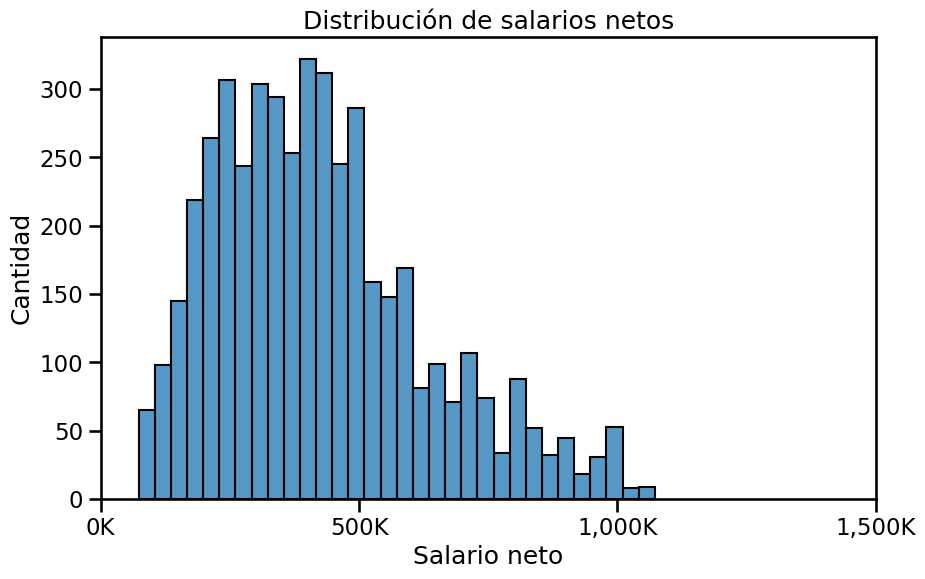

In [181]:
# Creamos la copia del DataFrame para utilizar a posteriori
df_real = df_lt_percentile.copy()

# Sacamos la columna de salario bruto
df_real.drop(columns='salary_monthly_BRUTO', inplace=True)

# Vemos la cantidad de filas que se eliminaron en total
print(f'Eliminamos un total de {df.shape[0] - df_real.shape[0]} filas.')

# GRÁFICO: Vemos la distribución que nos quedó para el sueldo neto
fig, ax = plt.subplots(figsize=(10, 6))
g = sns.histplot(df_real['salary_monthly_NETO'], ax=ax)

plt.title('Distribución de salarios netos')
plt.xlabel('Salario neto')
plt.ylabel('Cantidad')

# Para que los ticks del eje x se vean mejor y con K para indicar miles
tick_diff = 500_000
g.set_xticks(np.arange(0, df_real['salary_monthly_NETO'].max() + tick_diff, tick_diff))
xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)

plt.show()

#### Filtrado de lenguajes de programación relevantes

En este punto, tenemos que considerar que la información de los lenguajes de programación utilizados es un *string* con estos separados por comas.

In [182]:
df_real['tools_programming_languages'].head()

0                                   Bash/Shell, Python
1    Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...
2              SQL, Oracle APEX, PL-SQL, SQL Developer
3                                                 ABAP
4                                                 Java
Name: tools_programming_languages, dtype: object

Por ello mismo, lo que vamos a hacer es replicar varias veces las filas por cada uno de los lenguajes que esta refiere. Por ello, hacemos:

In [183]:
# Creamos una copia y separamos los lenguajes de programación duplicando los valores del salario neto
df_per_language = df_real.copy()
df_per_language['tools_programming_languages'] = df_per_language['tools_programming_languages'].str.split(',')
df_per_language = df_per_language.explode('tools_programming_languages')

# Sacamos los espacios iniciales y finales que tengan los strings de los lenguajes
df_per_language['tools_programming_languages'] = df_per_language['tools_programming_languages'].str.strip()

# Vemos el head para chequear
df_per_language.head()

,salary_monthly_NETO,tools_programming_languages
0,520000.0,Bash/Shell
0,520000.0,Python
1,520000.0,Bash/Shell
1,520000.0,CSS
1,520000.0,HTML


Luego, vamos a sacar la opción "Ninguno de los anteriores" para considerar realmente lenguajes de programación:

In [184]:
# Sacamos las filas con "Ninguno de los anteriores"
df_per_language_real = df_per_language[df_per_language['tools_programming_languages'] != 'Ninguno de los anteriores']

# Vemos cuántas filas quedaron y cuántas eliminamos
print(f'Eliminamos un total de {df_per_language.shape[0] - df_per_language_real.shape[0]} filas.')

Eliminamos un total de 766 filas.


Ya teniendo esto, para seleccionar cuáles queremos que sean los lenguajes de programación relevantes, vamos a ver las cantidades de cada uno de ellos:

In [185]:
# Hacemos el conteo de los lenguajes
language_count = df_per_language_real['tools_programming_languages'].value_counts().reset_index().rename(columns={'tools_programming_languages': 'language'})

# Vemos el head para chequear
language_count.head()

,language,count
0,SQL,2046
1,Javascript,1770
2,HTML,1318
3,Python,1266
4,Java,892


Dado esto, entonces, vamos a considerar todos aquellos lenguajes cuya frecuencia es mayor a $100$ para poder tener una buena muestra de programadores para estimar el sueldo promedio de estos. Por ello, los lenguajes a considerar serán:

In [186]:
# Elegimos los lenguajes más populares (con frecuencia mayor a 100)
popular_languages = language_count[language_count['count'] >= 100]['language']

# Lo convertimos a lista
popular_languages = popular_languages.tolist()

# Mostramos los lenguajes más populares
popular_languages

['SQL',
 'Javascript',
 'HTML',
 'Python',
 'Java',
 'CSS',
 'TypeScript',
 'Bash/Shell',
 '.NET',
 'PHP',
 'C#',
 'Go',
 'VBA',
 'C++',
 'Kotlin']

Hecho esto, entonces, nos quedamos únicamente con las filas cuyo lenguaje sea popular según nuestro criterio:

In [187]:
# Nos quedamos con los lenguajes más populares
df_popular_languages = df_per_language_real[df_per_language_real['tools_programming_languages'].isin(popular_languages)]

# Vemos cuántas filas quedaron y cuántas eliminamos
print(f'Eliminamos un total de {df_per_language_real.shape[0] - df_popular_languages.shape[0]} filas.')

# Vemos el unique de los lenguajes para chequear
df_popular_languages['tools_programming_languages'].unique()

Eliminamos un total de 968 filas.


array(['Bash/Shell', 'Python', 'CSS', 'HTML', 'Javascript', 'PHP', 'SQL',
       'TypeScript', 'VBA', 'Java', 'Kotlin', '.NET', 'C#', 'Go', 'C++'],
      dtype=object)

#### Análisis de la relación *Lenguaje de Programación* - *Salario*

En este punto, ya hecho todos los filtros y transformaciones correspondientes a nuestro DataFrame, lo que queremos hacer es responder a nuestra pregunta inicial: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

La forma en la que elegimos realizar las comparaciones es mediante la comparación de las distribuciones de salario para cada lenguaje, utilizando, para ello, *visualizaciones*.

In [188]:
# Creamos una copia para utilizar a posteriori y que sea más claro y fácil trabajar
df2 = df_popular_languages.copy().rename(columns={'tools_programming_languages': 'language', 'salary_monthly_NETO': 'salary'}).reset_index(drop=True)

Para ello, entonces, veamos la comparación de los lenguajes de interés utilizando uno de los mejores gráficos para ello, el **Gráfico de Caja**:

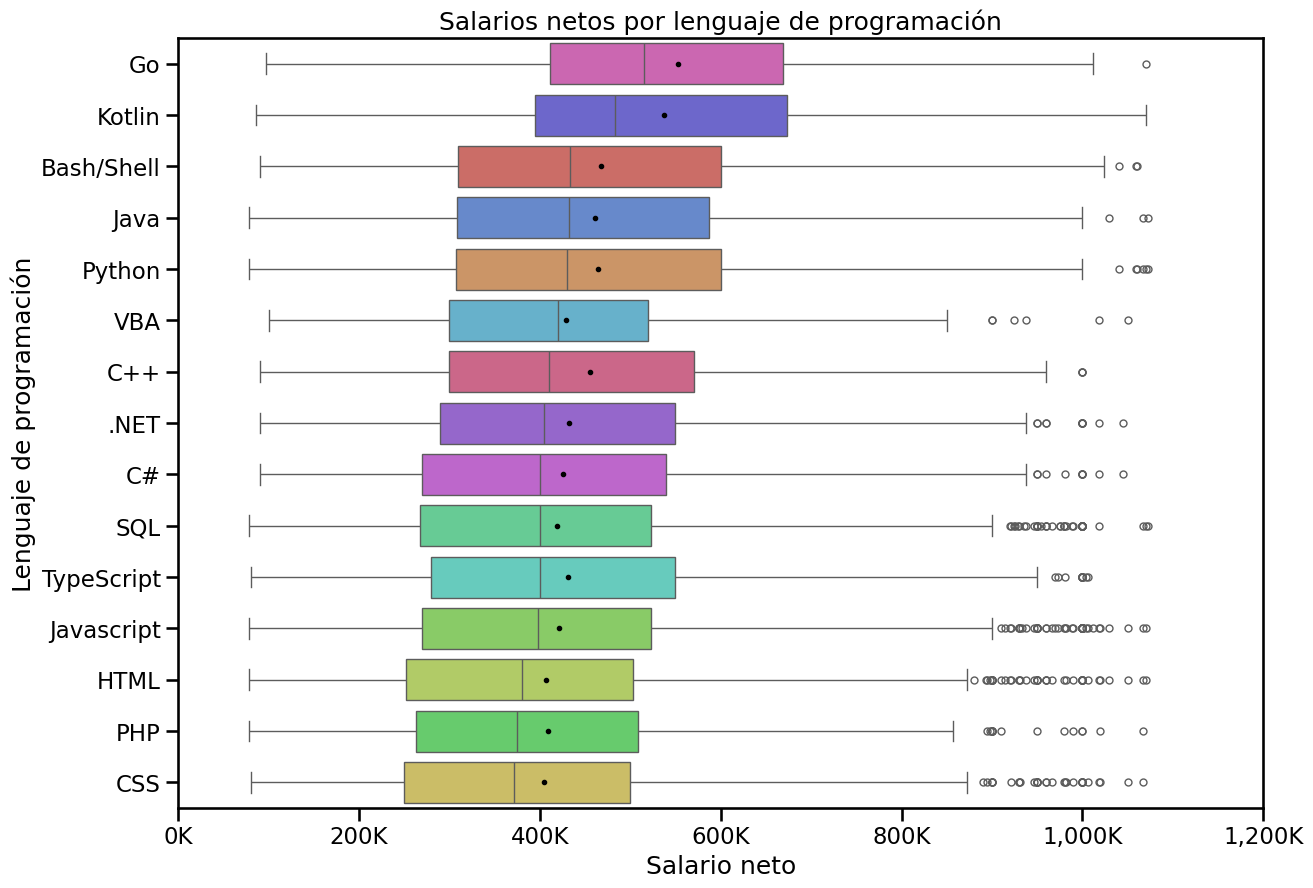

In [220]:
# GRÁFICO: Vemos la distribución de los salarios netos por lenguaje con el BOXPLOT
# Los lenguajes se ordenan de acuerdo a la mediana de los salarios netos para mayor claridad en la visualización
df_median_order = df2.groupby('language')['salary'].median().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(14, 10))
g = sns.boxplot(x='salary', y='language', data=df2, ax=ax, order=df_median_order, fliersize=5, palette="hls", hue='language', showmeans=True, meanprops={"marker":".","markerfacecolor":"black", "markeredgecolor":"black"})

plt.title('Salarios netos por lenguaje de programación')
plt.xlabel('Salario neto')
plt.ylabel('Lenguaje de programación')

# Para que los ticks del eje x se vean mejor y con K para indicar miles
tick_diff = 200_000
g.set_xticks(np.arange(0, df2['salary'].max() + tick_diff, tick_diff))
xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)

plt.show()

Luego, de esto, resulta interesante notar que los *valores extremos superiores* llegan aproximadamente al mismo monto, por lo que los máximos no nos marcan una diferencia entre cada uno de los lenguajes.

Sin embargo, si comparamos la *totalidad* de sueldos por lenguaje, podemos ver que por las distribuciones, son **Go** y **Kotlin** los lenguajes con sueldos más altos respecto a los demás en varias métricas, dado que el sueldo promedio es mucho mayor al de los demás y su distribución es más consistente, dado que no presenta muchos puntos extremos o anómalos, y el Rango Intercuartil abarca una gran cantidad de sueldos, al igual que los bigotes.
Por ello mismo, entonces, podemos decir que, por lo general, los sueldos de los programadores que trabajan con **Go** y **Kotlin** son superior a los demás, tanto en métricas puntuales (como *media* o *mediana*) y en general porque su rango intercuartil abarca valores más altos.

A fines prácticos y para agregar a este ejercicio, podemos ver también las comparaciones de los sueldos según la *media*, la *mediana* y el *percentil $90$* (que representa a los salarios más altos)

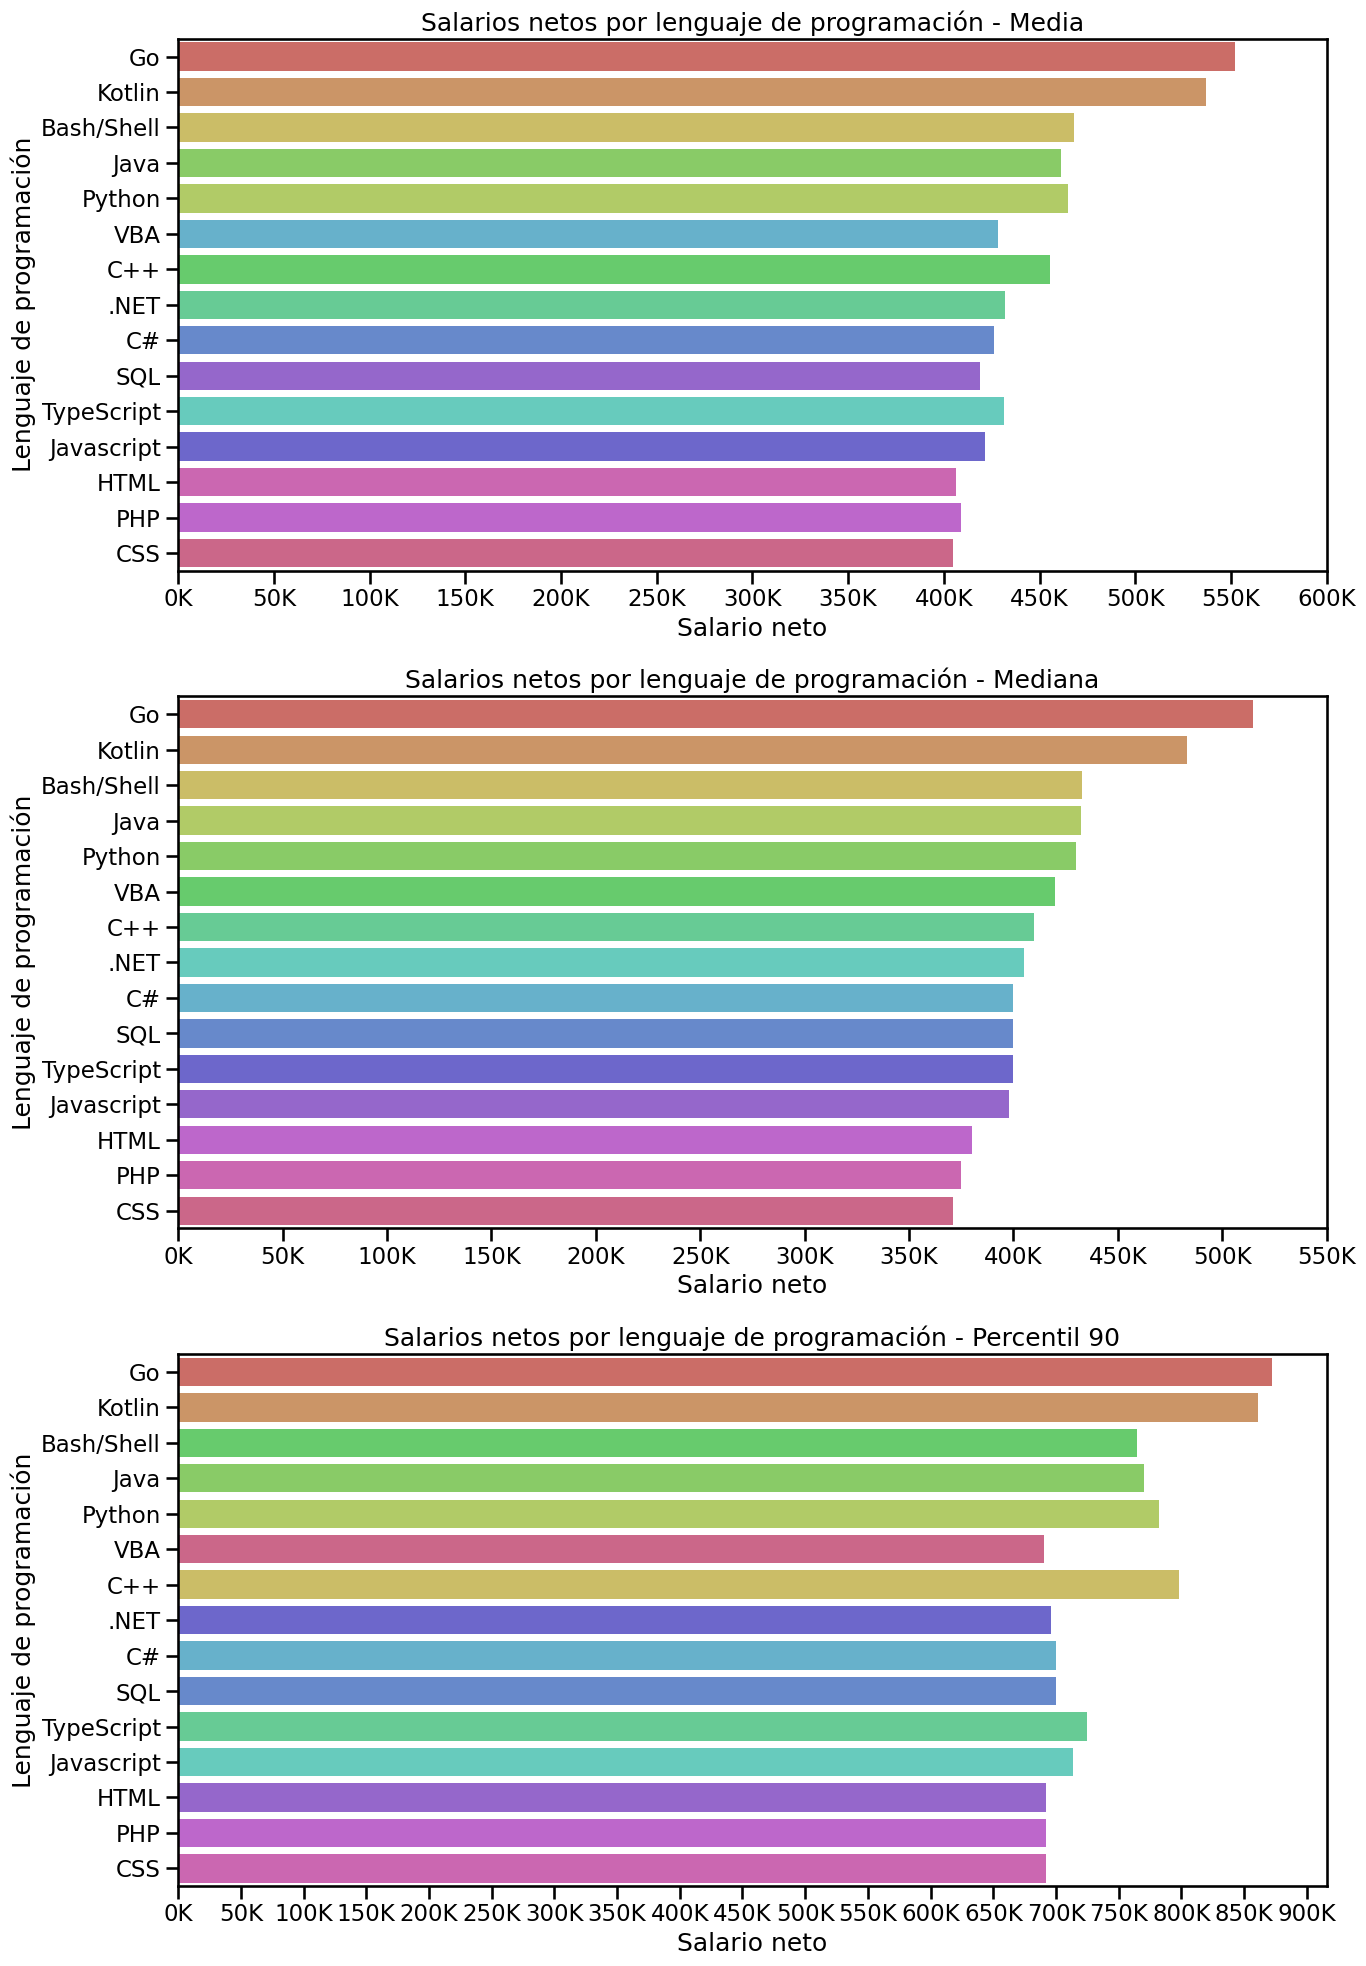

In [221]:
# GRÁFICO: Vemos la distribución de los salarios netos con BARPLOT

# Hacemos para media, mediana y percentil 90
df_mean = df2.groupby('language')['salary'].mean().sort_values(ascending=False).reset_index()
df_median = df2.groupby('language')['salary'].median().sort_values(ascending=False).reset_index()
df_percentile = df2.groupby('language')['salary'].quantile(0.9).sort_values(ascending=False).reset_index()

df_to_draw = [[df_mean, "Media"], [df_median, "Mediana"], [df_percentile, "Percentil 90"]]

# Graficamos
fig, ax = plt.subplots(3, 1, figsize=(14, 20))

for i, (df_group, title) in enumerate(df_to_draw):
    g = sns.barplot(x='salary', y='language', data=df_group, ax=ax[i], palette='hls', hue='language', errorbar=None, order=df_median_order)

    ax[i].set_title(f'Salarios netos por lenguaje de programación - {title}')
    ax[i].set_xlabel('Salario neto')
    ax[i].set_ylabel('Lenguaje de programación')

    # Para que los ticks del eje x se vean mejor y con K para indicar miles
    tick_diff = 50_000
    g.set_xticks(np.arange(0, df_group['salary'].max() + tick_diff, tick_diff))
    xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
    g.set_xticklabels(xlabels)

plt.tight_layout()
plt.show()

Y resulta que, como bien lo previmos con los **Box Plots**, los lenguajes de *Go* y *Kotlin* son superiores a los demás lenguajes de programación en todos los aspectos considerados.

Por ello, entonces, **los lenguajes de programación asociados a los mejores salarios son Go y Kotlin** para programadores Argentinos en el año *2023*.